In [34]:
# Step 1: Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [18]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Step 3: Load Your Dataset
data_dir = '/content/drive/My Drive/isl/ISL_Dataset'  # Update with your dataset path
categories = os.listdir(data_dir)
data = []
labels = []

In [20]:
# Step 4: Data Preprocessing
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)  # Label each class with an index
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, (28, 28))  # Resize images to 64x64 pixels
            data.append(resized_array)
            labels.append(class_num)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

In [21]:
# Convert lists to numpy arrays
data = np.array(data).reshape(-1, 28, 28, 1)
data = data / 255.0  # Normalize the data
labels = to_categorical(labels, num_classes=len(categories))

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [36]:
# Step 5: Build and Train the Model
#import keras as keras
#from keras.layers import BatchNormalization, Sequential, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [38]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=15)

Epoch 1/15
18/18 [==============================] - 3s 99ms/step - loss: 3.1487 - accuracy: 0.0535 - val_loss: 3.1355 - val_accuracy: 0.0567
Epoch 2/15
18/18 [==============================] - 2s 84ms/step - loss: 3.1328 - accuracy: 0.0446 - val_loss: 3.1347 - val_accuracy: 0.0567
Epoch 3/15
18/18 [==============================] - 2s 86ms/step - loss: 3.1250 - accuracy: 0.0660 - val_loss: 3.1395 - val_accuracy: 0.0284
Epoch 4/15
18/18 [==============================] - 2s 88ms/step - loss: 3.1298 - accuracy: 0.0499 - val_loss: 3.1347 - val_accuracy: 0.0355
Epoch 5/15
18/18 [==============================] - 2s 83ms/step - loss: 3.1227 - accuracy: 0.0766 - val_loss: 3.1436 - val_accuracy: 0.0780
Epoch 6/15
18/18 [==============================] - 2s 100ms/step - loss: 3.1215 - accuracy: 0.0535 - val_loss: 3.1354 - val_accuracy: 0.0851
Epoch 7/15
18/18 [==============================] - 2s 134ms/step - loss: 3.1083 - accuracy: 0.0570 - val_loss: 3.1378 - val_accuracy: 0.0355
Epoch 8/15


In [39]:
# Save the model
model.save('/content/drive/My Drive/isl_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# Step 6: Prediction Function
def predict_gesture(img_path, model, categories):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28,28, 1) / 255.0

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_letter = categories[predicted_class]
    return predicted_letter

In [44]:
# Load the model and test a sample image
model = load_model('/content/drive/My Drive/isl_model.h5')

1/1 [==============================] - 0s 27ms/step
Predicted Text: Q


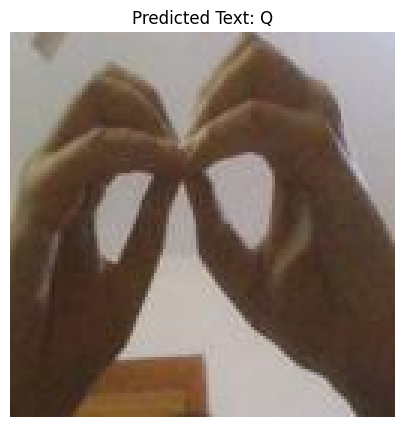

In [46]:
import matplotlib.pyplot as plt
import cv2

# Step 7: Test with an Image
test_image_path = '/content/drive/My Drive/B (1).jpg'  # Update with your test image path

# Predict the gesture
predicted_text = predict_gesture(test_image_path, model, categories)
print("Predicted Text:", predicted_text)

# Load the image
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct display

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.title(f"Predicted Text: {predicted_text}")
plt.axis('off')  # Hide the axes
plt.show()
